Data Cleaning
Insert Data as a csv file without first 2 columns(time tags) and added net coal flow after U1 Coal F2. Download output csv file per compartment.
Index of a compartment y in pass x, is (x-1)+4*y, eg: compartment 5 in Pass B is (2-1)+4*5=21

In [ ]:

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
from scipy.stats import pearsonr
data = pd.read_csv("/content/drive/MyDrive/min_raw.csv", header=None)
cnt=[]
ffdp=[]

def g_ffdp(x):
    if x>=1000 and x<=3000:
        return True
    else:
        return False


def g_sov(x):
    if x>1.8 and x<4.5:
        return True
    else:
        return False

def g_pow(x):
    if x>=400 and x<=600:
        return True
    else:
        return False

def g_coal(x):
    if x>=250 and x<=450:
        return True
    else:
        return False


def g_curr(x):
    if x>200 and x<350:
        return True
    else:
        return False

i=22
while i<=116:
    x=data[i].values
    ffdp.append(x)
    cn=0
    for j in range(1,44641):
        x[j]=float(x[j])
        if x[j]>=1000 and x[j]<=3000:
            cn=cn+1
    cnt.append(cn)
    i=i+2
print(cnt)

for j in range(1,44641):
    for k in range(0,len(ffdp)):
            ffdp[k][j]=float(ffdp[k][j])



d=pd.read_csv("/content/cor_d_5min3mon.csv", header=None)
cor_d_=d.values




sov=[]
ncnt=[]

a=21
while a<=115:
  sov.append(data[a].values)
  a=a+2
for j in range(1,44641):
    for k in range(0,len(sov)):
           sov[k][j]=float(sov[k][j])




index=[]
indexval=[]
for p in range(0,48):
    indexval.append([])
    fcn=0
    q=1
    while q<44641:
        if g_ffdp(ffdp[p][q])==True and g_sov(sov[p][q])==True:
            vcn=0
            for z in [0,1,18,19,20]:
                y=data[z].values
                if z==18:
                    if g_coal(float(y[q]))==True:
                        vcn=vcn+1

                elif z==0 or z==1:
                    if g_pow(float(y[q]))==True:
                        vcn=vcn+1
                else:
                    if g_curr(float(y[q]))==True:
                        vcn=vcn+1
            if vcn==5:
                fcn=fcn+1
                indexval[p].append(q)

        q=q+1
    if fcn>=1000:
        index.append(p)

for v in index:
    dat=[]
    for w in range(0,len(indexval[v])):
        dat.append([])
        dat[w].append(ffdp[v][indexval[v][w]])
        dat[w].append(sov[v][indexval[v][w]])
        for u in [0,1,18,19,20]:
            s=data[u].values
            dat[w].append(float(s[indexval[v][w]]))
        for c in range(0,48):
            if c!=v and cor_d_[c][v]>=0.8 and (g_ffdp(ffdp[c][indexval[v][w]])==True ):
                dat[w].append(c)
                dat[w].append(ffdp[c][indexval[v][w]])
            elif c!=v and cor_d_[c][v]>=0.8 and (g_ffdp(ffdp[c][indexval[v][w]])==False):
                dat[w].clear()
                break


    res = [ele for ele in dat if ele != []]
    print(v,len(res))

    df_p = pd.DataFrame(res)
    df_p.to_csv("output_minraw_test"+str(v)+".csv")



In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import initializers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Here, corresponding to each compartment in a pass, upload the weights folder and uncomment the corresponding line

In [ ]:

from tensorflow.keras import layers, regularizers

input1 = keras.Input(shape=(1,), name='input1')
input2 = keras.Input(shape=(1,), name='input2')
layer1=layers.Dense(1, activation=tf.keras.activations.exponential)(input1)



startl=layers.concatenate([layer1,input2])
layer4= layers.Dense(2, activation='relu')(startl)
output = layers.Dense(1,activation=tf.keras.activations.relu)(layer4)
model = keras.Model(inputs=[input1,input2], outputs=output)

#model.load_weights('/content/model_weights_8_new.h5')
#model.load_weights('/content/model_weights_13_new.h5')
#model.load_weights('/content/model_weights_33_new.h5')
#model.load_weights('/content/model_weights_10 (1).h5')
#model.load_weights('/content/model_weights_26 (2).h5')
#model.load_weights('/content/model_weights_7_new.h5')
#model.load_weights('/content/model_weights_11_new.h5')
#model.load_weights('/content/model_weights_15.h5')
#model.load_weights('/content/model_weights_23.h5')
#model.load_weights('/content/model_weights_27.h5')
#model.load_weights('/content/model_weights_4 (1).h5')



Pass A
Compartment:3
Index:8

In [ ]:

test=pd.DataFrame()
pca_ffdp=[0.57248496, 0.58514179, 0.57434315]
pca_feat=[0.03887644 ,-0.59489657, -0.54412591, -0.59035048]

f1mean=1716.9635508944125
f1s=199.1251165256806
f2mean=1712.781780834077
f2s=208.6891276864149
f3mean=1945.543155575101
f3s=218.9126024042871

sovs=0.19049292707861584
sovmean=7.304815316596779
ggs=0.03488780724792173
ggmean=13.507373410903815
coals=0.06017366887425571
coalmean=13.626500636567044
ids=0.09308412291255806
idmean=5.5138171145740635

#Input the path of the compartment(named by index) file
data_pca_2 = pd.read_csv("/content/output_minraw8_test.csv")
print(data_pca_2.head())

for i in range(0,7):
  data_pca_2=data_pca_2.drop_duplicates(subset=[str(i)],keep='first')
data_pca_2=data_pca_2.drop_duplicates(subset='8',keep='first')
data_pca_2=data_pca_2.drop_duplicates(subset='10',keep='first')
data_pca_2=data_pca_2.drop_duplicates(subset='12',keep='first')
data_pca_2=data_pca_2.drop_duplicates(subset='14',keep='first')

data_pca_2['8']=(data_pca_2['8']-f1mean)/f1s

data_pca_2['12']=(data_pca_2['12']-f2mean)/f2s
data_pca_2['14']=(data_pca_2['14']-f3mean)/f3s

test['0']=data_pca_2['0']
test['PCA-1']=data_pca_2['8']*pca_ffdp[0]+data_pca_2['12']*pca_ffdp[1]+data_pca_2['14']*pca_ffdp[2]

d=data_pca_2.copy()



d['1']=np.log(401.865 * d['1'])
d['2']=np.log(1000 * 1.3 * d['2'])
d['4']=np.log(2204 * 62 * (1 / 60) * d['4'])
d['5']=np.log(d['5'])

d['1']=(d['1']-sovmean)/sovs
d['2']=(d['2']-ggmean)/ggs
d['4']=(d['4']-coalmean)/coals
d['5']=(d['5']-idmean)/ids

test['PCA_1']=d['1']*pca_feat[0]+d['2']*pca_feat[1]+d['4']*pca_feat[2]+d['5']*pca_feat[3]

pcadpmax=6.6777842725874805
pcadpmin=-5.839159256656099
pca_1max=4.729013707251112
pca_1min=-4.023554681752158
pca_2max=3.845015870696546
pca_2min=-1.3632627541527942

test['0']=(test['0']-1000)/(2000)
test['PCA-1']=(test['PCA-1']-pcadpmin)/(pcadpmax-pcadpmin)
test['PCA_1']=(test['PCA_1']-pca_1min)/(pca_1max-pca_1min)

for i in range(0,len(test['PCA_1'])):
  if test['PCA_1'][i]<0:
    test['PCA_1'][i]=0

  if test['PCA-1'][i]<0:
    test['PCA-1'][i]=0
  if test['PCA-1'][i]>1:
    test['PCA-1'][i]=1
  if test['PCA_1'][i]>1:
    test['PCA_1'][i]=1



y_=model.predict({"input1": test[['PCA_1']],"input2": test[['PCA-1']]})
z_=y_.reshape(-1)
max=3000
min=1000
for i in range(len(z_)):
  z_[i]=z_[i]*(max-min)+min

z__=[]
for i in test['0']:
  z__.append(i*(max-min)+min)

s=0
print(len(z_))

for i in range(len(z_)):
  s=s+(abs(z_[i]-z__[i]))
print((s/len(z__)))
print(len(y_))





             0         1           2           3           4           5  \
0  1553.009287  3.137438  525.494530  490.926187  339.946340  239.950782   
1  1514.593482  2.993416  525.296344  487.189688  348.366260  241.653779   
2  1521.440414  1.892440  525.703635  488.108929  348.340226  242.269480   
3  1530.486496  2.634850  526.110927  489.268167  348.840788  242.991631   
4  1523.815295  2.756871  526.518218  490.179651  349.167229  242.942096   

            6  7            8  9           10  11           12  13  \
0  227.420279  0  1390.685760  4  1455.433983   9  1393.590147  12   
1  213.991272  0  1359.521950  4  1421.666120   9  1359.874677  12   
2  221.375403  0  1371.253251  4  1433.374214   9  1366.432488  12   
3  242.514798  0  1375.609162  4  1436.828611   9  1376.249920  12   
4  243.887963  0  1369.941779  4  1433.957110   9  1373.251103  12   

            14  
0  1642.283877  
1  1607.865564  
2  1615.365929  
3  1619.019378  
4  1616.241550  
775/775 [===========

Plot of DP against one of the 2 variables, one of them varying from 0 to 1.

250
8/8 [==============================] - 0s 2ms/step


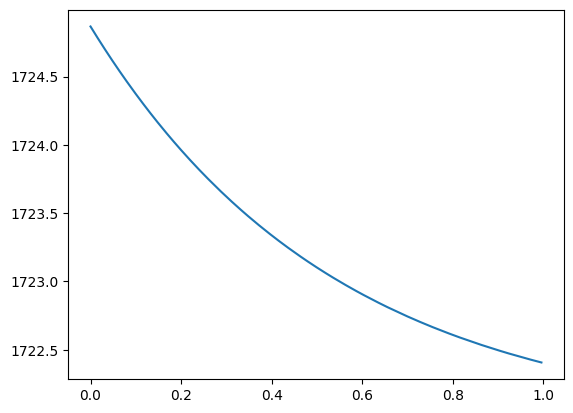

In [ ]:

l1=[]
for i in range(1,251):
  l1.append(0.5)
l1=np.array(l1)
x = np.arange(0,1,0.004)
print(len(l1))
tdat = pd.DataFrame({'0': l1, '1': x}, columns=['0', '1'])

y_id=model.predict({"input1": tdat[['1']],"input2": tdat[['0']]})
y_id=y_id.reshape(-1)

for i in range(len(y_id)):
  y_id[i]=y_id[i]*(2000)+1000
plt.plot(tdat['1'],y_id)
plt.show()


Pass B
Compartment:4
Index:13

In [ ]:

test=pd.DataFrame()
pca_ffdp=[1]
pca_feat=[ 0.00404684 ,-0.5971278,  -0.54113358, -0.59211186]

f1mean=1765.640581037463
f1s=193.07254542768706


sovs=0.18148081247741704
sovmean=7.146586942959417
ggs=0.034680703067493844
ggmean=13.508007353961725
coals=0.06149507411830222
coalmean=13.627300293998278
ids=0.09390488651283105
idmean=5.518119388119546

data_pca_2 = pd.read_csv("/content/output_minraw13.csv")
print(data_pca_2.head())

for i in range(0,7):
  data_pca_2=data_pca_2.drop_duplicates(subset=[str(i)],keep='first')
data_pca_2=data_pca_2.drop_duplicates(subset='8',keep='first')


data_pca_2['8']=(data_pca_2['8']-f1mean)/f1s

test['0']=data_pca_2['0']
test['PCA-1']=data_pca_2['8']*pca_ffdp[0]

d=data_pca_2.copy()



d['1']=np.log(401.865 * d['1'])
d['2']=np.log(1000 * 1.3 * d['2'])
d['4']=np.log(2204 * 62 * (1 / 60) * d['4'])
d['5']=np.log(d['5'])

d['1']=(d['1']-sovmean)/sovs
d['2']=(d['2']-ggmean)/ggs
d['4']=(d['4']-coalmean)/coals
d['5']=(d['5']-idmean)/ids

test['PCA_1']=d['1']*pca_feat[0]+d['2']*pca_feat[1]+d['4']*pca_feat[2]+d['5']*pca_feat[3]

pcadpmax=6.299857038097156
pcadpmin=-3.941397324775509
pca_1max=4.772976654877096
pca_1min=-3.9622136568981605
pca_2max=3.4137782270245727
pca_2min=-2.1495733319745542

test['0']=(test['0']-1000)/(2000)
test['PCA-1']=(test['PCA-1']-pcadpmin)/(pcadpmax-pcadpmin)
test['PCA_1']=(test['PCA_1']-pca_1min)/(pca_1max-pca_1min)

for i in range(0,len(test['PCA_1'])):
  if test['PCA_1'][i]<0:
    test['PCA_1'][i]=0

  if test['PCA-1'][i]<0:
    test['PCA-1'][i]=0
  if test['PCA-1'][i]>1:
    test['PCA-1'][i]=1
  if test['PCA_1'][i]>1:
    test['PCA_1'][i]=1



y_=model.predict({"input1": test[['PCA_1']],"input2": test[['PCA-1']]})
z_=y_.reshape(-1)
max=3000
min=1000
for i in range(len(z_)):
  z_[i]=z_[i]*(max-min)+min

z__=[]
for i in test['0']:
  z__.append(i*(max-min)+min)

s=0
print(len(z_))

for i in range(len(z_)):
  s=s+(abs(z_[i]-z__[i]))
print((s/len(z__)))
print(len(y_))

             0         1           2           3           4           5  \
0  1811.919210  3.618657  582.068942  549.921871  395.458889  229.419698   
1  1804.203405  3.429457  581.874902  549.711222  393.917649  229.433265   
2  1807.395059  3.499250  581.567069  549.358102  396.282417  229.549330   
3  1796.706993  2.933441  582.226850  549.970469  396.829122  229.294871   
4  1803.732812  3.717992  582.575792  550.382202  395.958611  228.992508   

            6  7            8  
0  228.858501  1  1663.109464  
1  212.574106  1  1651.932578  
2  228.416553  1  1652.408031  
3  208.847478  1  1649.025691  
4  215.940400  1  1642.897788  
973/973 [==============================] - 1s 1ms/step
31124
30.277562674718798
31124


Pass B
Compartment:9
Index:33

In [ ]:

test=pd.DataFrame()
pca_ffdp=[-0.70710678, -0.70710678]
pca_feat=[0.28472224, -0.62219557, -0.32069711, -0.65494984]

f1mean=2010.7936568874434
f1s=332.3253529040816
f2mean=1802.5262690624875
f2s=312.93604132398804


sovs=0.1451078291140438
sovmean=7.208280414774008
ggs=0.03195800799884956
ggmean=13.50419186658403
coals=0.04801724967159896
coalmean=13.631505740930397
ids=0.08669794000292956
idmean=5.66314423711619

data_pca_2 = pd.read_csv("/content/output_minraw33.csv")
print(data_pca_2.head())

for i in range(0,7):
  data_pca_2=data_pca_2.drop_duplicates(subset=[str(i)],keep='first')
data_pca_2=data_pca_2.drop_duplicates(subset='18',keep='first')
data_pca_2=data_pca_2.drop_duplicates(subset='22',keep='first')



data_pca_2['18']=(data_pca_2['18']-f1mean)/f1s
data_pca_2['22']=(data_pca_2['22']-f2mean)/f2s

test['0']=data_pca_2['0']
test['PCA-1']=data_pca_2['18']*pca_ffdp[0]+data_pca_2['22']*pca_ffdp[1]

d=data_pca_2.copy()



d['1']=np.log(401.865 * d['1'])
d['2']=np.log(1000 * 1.3 * d['2'])
d['4']=np.log(2204 * 62 * (1 / 60) * d['4'])
d['5']=np.log(d['5'])

d['1']=(d['1']-sovmean)/sovs
d['2']=(d['2']-ggmean)/ggs
d['4']=(d['4']-coalmean)/coals
d['5']=(d['5']-idmean)/ids

test['PCA_1']=d['1']*pca_feat[0]+d['2']*pca_feat[1]+d['4']*pca_feat[2]+d['5']*pca_feat[3]

pcadpmax=6.299857038097156
pcadpmin=-3.941397324775509
pca_1max=4.772976654877096
pca_1min=-3.9622136568981605
pca_2max=3.4137782270245727
pca_2min=-2.1495733319745542

test['0']=(test['0']-1000)/(2000)
test['PCA-1']=(test['PCA-1']-pcadpmin)/(pcadpmax-pcadpmin)
test['PCA_1']=(test['PCA_1']-pca_1min)/(pca_1max-pca_1min)

for i in range(0,len(test['PCA_1'])):
  if test['PCA_1'][i]<0:
    test['PCA_1'][i]=0

  if test['PCA-1'][i]<0:
    test['PCA-1'][i]=0
  if test['PCA-1'][i]>1:
    test['PCA-1'][i]=1
  if test['PCA_1'][i]>1:
    test['PCA_1'][i]=1



y_=model.predict({"input1": test[['PCA_1']],"input2": test[['PCA-1']]})
z_=y_.reshape(-1)
max=3000
min=1000
for i in range(len(z_)):
  z_[i]=z_[i]*(max-min)+min

z__=[]
for i in test['0']:
  z__.append(i*(max-min)+min)

s=0
print(len(z_))

for i in range(len(z_)):
  s=s+(abs(z_[i]-z__[i]))
print((s/len(z__)))
print(len(y_))

             0         1           2           3           4           5  \
0  1811.919210  3.618657  582.068942  549.921871  395.458889  229.419698   
1  1804.203405  3.429457  581.874902  549.711222  393.917649  229.433265   
2  1807.395059  3.499250  581.567069  549.358102  396.282417  229.549330   
3  1796.706993  2.933441  582.226850  549.970469  396.829122  229.294871   
4  1803.732812  3.717992  582.575792  550.382202  395.958611  228.992508   

            6  7            8  
0  228.858501  1  1663.109464  
1  212.574106  1  1651.932578  
2  228.416553  1  1652.408031  
3  208.847478  1  1649.025691  
4  215.940400  1  1642.897788  
973/973 [==============================] - 1s 1ms/step
31124
30.277562674718798
31124


Pass C
Compartment:3
Index:10

In [ ]:

test=pd.DataFrame()
pca_ffdp=[-0.70710678, -0.70710678]
pca_feat=[ 0.00863823, -0.61442894, -0.58806941, -0.52590572]

f1mean=2029.2519120069146
f1s=222.56829724536854
f2mean=2085.5137219160324
f2s=224.57220936365647


sovs=0.17639302769125803
sovmean=7.289111444420061
ggs=0.034622663398559544
ggmean=13.507250679019354
coals=0.060872381032083735
coalmean=13.62662891026073
ids=0.07856904027343298
idmean=5.476949742774191

data_pca_2 = pd.read_csv("/content/output_minraw10 (2).csv")
print(data_pca_2.head())

for i in range(0,7):
  data_pca_2=data_pca_2.drop_duplicates(subset=[str(i)],keep='first')
data_pca_2=data_pca_2.drop_duplicates(subset='8',keep='first')
data_pca_2=data_pca_2.drop_duplicates(subset='10',keep='first')



data_pca_2['8']=(data_pca_2['8']-f1mean)/f1s
data_pca_2['10']=(data_pca_2['10']-f2mean)/f2s

test['0']=data_pca_2['0']
test['PCA-1']=data_pca_2['8']*pca_ffdp[0]+data_pca_2['10']*pca_ffdp[1]

d=data_pca_2.copy()



d['1']=np.log(401.865 * d['1'])
d['2']=np.log(1000 * 1.3 * d['2'])
d['4']=np.log(2204 * 62 * (1 / 60) * d['4'])
d['6']=np.log(d['6'])

d['1']=(d['1']-sovmean)/sovs
d['2']=(d['2']-ggmean)/ggs
d['4']=(d['4']-coalmean)/coals
d['6']=(d['6']-idmean)/ids

test['PCA_1']=d['1']*pca_feat[0]+d['2']*pca_feat[1]+d['4']*pca_feat[2]+d['6']*pca_feat[3]

pcadpmax=6.019058070172551
pcadpmin=-4.467093791197485
pca_1max=4.822351508786182
pca_1min=-3.708717510531032
pca_2max=4.033289880408276
pca_2min=-1.2992492355764262

test['0']=(test['0']-1000)/(2000)
test['PCA-1']=(test['PCA-1']-pcadpmin)/(pcadpmax-pcadpmin)
test['PCA_1']=(test['PCA_1']-pca_1min)/(pca_1max-pca_1min)

for i in range(0,len(test['PCA_1'])):
  if test['PCA_1'][i]<0:
    test['PCA_1'][i]=0

  if test['PCA-1'][i]<0:
    test['PCA-1'][i]=0
  if test['PCA-1'][i]>1:
    test['PCA-1'][i]=1
  if test['PCA_1'][i]>1:
    test['PCA_1'][i]=1



y_=model.predict({"input1": test[['PCA_1']],"input2": test[['PCA-1']]})
z_=y_.reshape(-1)
max=3000
min=1000
for i in range(len(z_)):
  z_[i]=z_[i]*(max-min)+min

z__=[]
for i in test['0']:
  z__.append(i*(max-min)+min)

s=0
print(len(z_))

for i in range(len(z_)):
  s=s+(abs(z_[i]-z__[i]))
print((s/len(z__)))
print(len(y_))

             0         1           2           3           4           5  \
0  1989.399166  4.035030  525.494530  490.926187  339.946340  239.950782   
1  2015.436290  4.150481  524.718153  489.423000  343.369800  240.278954   
2  2012.856560  3.931369  525.296344  487.189688  348.366260  241.653779   
3  1997.799274  2.391094  526.110927  489.268167  348.840788  242.991631   
4  2006.193921  3.546773  526.518218  490.179651  349.167229  242.942096   

            6  7            8   9           10  
0  227.420279  6  1986.092431  14  2039.345181  
1  207.907084  6  2004.286128  14  2053.240490  
2  213.991272  6  1958.774223  14  2058.726682  
3  242.514798  6  1982.931256  14  2028.672697  
4  243.887963  6  1997.123648  14  2050.112315  
816/816 [==============================] - 1s 1ms/step
26104
39.52434367143786
26104


Pass C
Compartment:7
Index:26

In [ ]:

test=pd.DataFrame()
pca_ffdp=[-0.70710678, -0.70710678]
pca_feat=[-0.07677512 ,-0.61420104, -0.5854752, -0.5235279 ]

f1mean=2017.2885198088172
f1s=202.18910874019178
f2mean=1871.8374794896122
f2s=193.38762579277764


sovs=0.18604380161641892
sovmean=7.193269970637644
ggs=0.034705554286433536
ggmean=13.507976612578775
coals=0.06141451544445318
coalmean=13.626601448632904
ids=0.0783496790065813
idmean=5.475829682631987

data_pca_2 = pd.read_csv("/content/output_minraw26 (2).csv")
print(data_pca_2.head())

for i in range(0,7):
  data_pca_2=data_pca_2.drop_duplicates(subset=[str(i)],keep='first')
data_pca_2=data_pca_2.drop_duplicates(subset='8',keep='first')
data_pca_2=data_pca_2.drop_duplicates(subset='10',keep='first')



data_pca_2['8']=(data_pca_2['8']-f1mean)/f1s
data_pca_2['10']=(data_pca_2['10']-f2mean)/f2s

test['0']=data_pca_2['0']
test['PCA-1']=data_pca_2['8']*pca_ffdp[0]+data_pca_2['10']*pca_ffdp[1]

d=data_pca_2.copy()



d['1']=np.log(401.865 * d['1'])
d['2']=np.log(1000 * 1.3 * d['2'])
d['4']=np.log(2204 * 62 * (1 / 60) * d['4'])
d['6']=np.log(d['6'])

d['1']=(d['1']-sovmean)/sovs
d['2']=(d['2']-ggmean)/ggs
d['4']=(d['4']-coalmean)/coals
d['6']=(d['6']-idmean)/ids

test['PCA_1']=d['1']*pca_feat[0]+d['2']*pca_feat[1]+d['4']*pca_feat[2]+d['6']*pca_feat[3]

pcadpmax=5.702257483279057
pcadpmin=-4.732415822003176
pca_1max=4.765091222742396
pca_1min=-3.7071580232463583
pca_2max=3.406644933740127
pca_2min=-1.955998610709084

test['0']=(test['0']-1000)/(2000)
test['PCA-1']=(test['PCA-1']-pcadpmin)/(pcadpmax-pcadpmin)
test['PCA_1']=(test['PCA_1']-pca_1min)/(pca_1max-pca_1min)

for i in range(0,len(test['PCA_1'])):
  if test['PCA_1'][i]<0:
    test['PCA_1'][i]=0

  if test['PCA-1'][i]<0:
    test['PCA-1'][i]=0
  if test['PCA-1'][i]>1:
    test['PCA-1'][i]=1
  if test['PCA_1'][i]>1:
    test['PCA_1'][i]=1



y_=model.predict({"input1": test[['PCA_1']],"input2": test[['PCA-1']]})
z_=y_.reshape(-1)
max=3000
min=1000
for i in range(len(z_)):
  z_[i]=z_[i]*(max-min)+min

z__=[]
for i in test['0']:
  z__.append(i*(max-min)+min)

s=0
print(len(z_))

for i in range(len(z_)):
  s=s+(abs(z_[i]-z__[i]))
print((s/len(z__)))
print(len(y_))

             0         1           2           3           4           5  \
0  1713.336944  3.267313  525.494530  490.926187  339.946340  239.950782   
1  1724.536510  2.737171  524.718153  489.423000  343.369800  240.278954   
2  1743.097720  2.315069  524.889053  487.733477  349.102117  240.913131   
3  1738.191245  2.711053  525.296344  487.189688  348.366260  241.653779   
4  1739.523279  2.373085  526.925509  491.626493  348.485119  241.994693   

            6   7            8   9           10  
0  227.420279  18  2028.750000  30  1818.959299  
1  207.907084  18  2039.498314  30  1832.472248  
2  208.986872  18  2044.958103  30  1848.508016  
3  213.991272  18  2043.749878  30  1846.442600  
4  242.944206  18  2051.873699  30  1841.476895  
808/808 [==============================] - 1s 1ms/step
25834
40.91709868726436
25834


Pass D
Compartment:2
Index:7

In [ ]:

test=pd.DataFrame()
pca_ffdp=[-0.70710678, -0.70710678]
pca_feat=[0.01066536, -0.63283764, -0.56093947, -0.53361941]

f1mean=1973.367970433447
f1s=258.08298418711297
f2mean=2067.6028380756425
f2s=254.42413600836332


sovs=0.1682022913306455
sovmean=7.3317823777162126
ggs=0.03566966279770593
ggmean=13.502033896555576
coals=0.0580237044103616
coalmean=13.632933814142817
ids=0.07689991946734508
idmean=5.46231736792081

data_pca_2 = pd.read_csv("/content/output_minraw7 (3).csv")
print(data_pca_2.head())

for i in range(0,7):
  data_pca_2=data_pca_2.drop_duplicates(subset=[str(i)],keep='first')
data_pca_2=data_pca_2.drop_duplicates(subset='8',keep='first')
data_pca_2=data_pca_2.drop_duplicates(subset='10',keep='first')



data_pca_2['8']=(data_pca_2['8']-f1mean)/f1s
data_pca_2['10']=(data_pca_2['10']-f2mean)/f2s

test['0']=data_pca_2['0']
test['PCA-1']=data_pca_2['8']*pca_ffdp[0]+data_pca_2['10']*pca_ffdp[1]

d=data_pca_2.copy()



d['1']=np.log(401.865 * d['1'])
d['2']=np.log(1000 * 1.3 * d['2'])
d['4']=np.log(2204 * 62 * (1 / 60) * d['4'])
d['6']=np.log(d['6'])

d['1']=(d['1']-sovmean)/sovs
d['2']=(d['2']-ggmean)/ggs
d['4']=(d['4']-coalmean)/coals
d['6']=(d['6']-idmean)/ids

test['PCA_1']=d['1']*pca_feat[0]+d['2']*pca_feat[1]+d['4']*pca_feat[2]+d['6']*pca_feat[3]

pcadpmax=5.507071961356738
pcadpmin=-3.534957631829677
pca_1max=4.190458339478526
pca_1min=-3.860486703219652
pca_2max=4.543430728888679
pca_2min=-1.4693507527299132

test['0']=(test['0']-1000)/(2000)
test['PCA-1']=(test['PCA-1']-pcadpmin)/(pcadpmax-pcadpmin)
test['PCA_1']=(test['PCA_1']-pca_1min)/(pca_1max-pca_1min)

for i in range(0,len(test['PCA_1'])):
  if test['PCA_1'][i]<0:
    test['PCA_1'][i]=0

  if test['PCA-1'][i]<0:
    test['PCA-1'][i]=0
  if test['PCA-1'][i]>1:
    test['PCA-1'][i]=1
  if test['PCA_1'][i]>1:
    test['PCA_1'][i]=1



y_=model.predict({"input1": test[['PCA_1']],"input2": test[['PCA-1']]})
z_=y_.reshape(-1)
max=3000
min=1000
for i in range(len(z_)):
  z_[i]=z_[i]*(max-min)+min

z__=[]
for i in test['0']:
  z__.append(i*(max-min)+min)

s=0
print(len(z_))

for i in range(len(z_)):
  s=s+(abs(z_[i]-z__[i]))
print((s/len(z__)))
print(len(y_))

             0         1           2           3           4           5  \
0  2035.833323  2.202638  525.494530  490.926187  339.946340  239.950782   
1  2049.263652  3.920046  524.718153  489.423000  343.369800  240.278954   
2  2055.128668  4.293220  524.889053  487.733477  349.102117  240.913131   
3  2050.600009  4.141819  525.296344  487.189688  348.366260  241.653779   
4  2043.880094  4.202451  525.703635  488.108929  348.340226  242.269480   

            6  7            8   9           10  11           12  
0  227.420279  3  2061.411162  11  2163.583708  35  2106.285925  
1  207.907084  3  2080.761091  11  2179.373716  35  2114.381297  
2  208.986872  3  2088.278110  11  2189.506215  35  2127.570645  
3  213.991272  3  2078.767760  11  2177.892246  35  2121.093750  
4  221.375403  3  2072.975258  11  2178.212687  35  2117.218759  
549/549 [==============================] - 1s 1ms/step
17546
59.057369828644354
17546


Pass D
Compartment:3
Index:11

In [ ]:

test=pd.DataFrame()
pca_ffdp=[-0.70710678, -0.70710678]
pca_feat=[-0.00415392, -0.63709995, -0.55577223, -0.5340446]

f1mean=1978.2487434207308
f1s=253.6137594163657
f2mean=1972.8529676947082
f2s=240.33616227487047


sovs=0.17996219037636108
sovmean=7.3057244656201945
ggs=0.03572046179462411
ggmean=13.50174219760252
coals=0.05905020870102793
coalmean=13.632451529607296
ids=0.07725570122031776
idmean=5.462393650181075

data_pca_2 = pd.read_csv("/content/output_minraw11 (3).csv")
print(data_pca_2.head())

for i in range(0,7):
  data_pca_2=data_pca_2.drop_duplicates(subset=[str(i)],keep='first')
data_pca_2=data_pca_2.drop_duplicates(subset='8',keep='first')
data_pca_2=data_pca_2.drop_duplicates(subset='10',keep='first')



data_pca_2['8']=(data_pca_2['8']-f1mean)/f1s
data_pca_2['10']=(data_pca_2['10']-f2mean)/f2s

test['0']=data_pca_2['0']
test['PCA-1']=data_pca_2['8']*pca_ffdp[0]+data_pca_2['10']*pca_ffdp[1]

d=data_pca_2.copy()



d['1']=np.log(401.865 * d['1'])
d['2']=np.log(1000 * 1.3 * d['2'])
d['4']=np.log(2204 * 62 * (1 / 60) * d['4'])
d['6']=np.log(d['6'])

d['1']=(d['1']-sovmean)/sovs
d['2']=(d['2']-ggmean)/ggs
d['4']=(d['4']-coalmean)/coals
d['6']=(d['6']-idmean)/ids

test['PCA_1']=d['1']*pca_feat[0]+d['2']*pca_feat[1]+d['4']*pca_feat[2]+d['6']*pca_feat[3]

pcadpmax=5.46171044994105
pcadpmin=-3.5455904031970102
pca_1max=4.616658543268941
pca_1min=-3.8317206671606905
pca_2max=4.074025179621976
pca_2min=-1.325180611685057

test['0']=(test['0']-1000)/(2000)
test['PCA-1']=(test['PCA-1']-pcadpmin)/(pcadpmax-pcadpmin)
test['PCA_1']=(test['PCA_1']-pca_1min)/(pca_1max-pca_1min)

for i in range(0,len(test['PCA_1'])):
  if test['PCA_1'][i]<0:
    test['PCA_1'][i]=0

  if test['PCA-1'][i]<0:
    test['PCA-1'][i]=0
  if test['PCA-1'][i]>1:
    test['PCA-1'][i]=1
  if test['PCA_1'][i]>1:
    test['PCA_1'][i]=1



y_=model.predict({"input1": test[['PCA_1']],"input2": test[['PCA-1']]})
z_=y_.reshape(-1)
max=3000
min=1000
for i in range(len(z_)):
  z_[i]=z_[i]*(max-min)+min

z__=[]
for i in test['0']:
  z__.append(i*(max-min)+min)

s=0
print(len(z_))

for i in range(len(z_)):
  s=s+(abs(z_[i]-z__[i]))
print((s/len(z__)))
print(len(y_))

Pass D
Compartment:4
Index:15

In [ ]:

test=pd.DataFrame()
pca_ffdp=[1]
pca_feat=[-0.05637907, -0.63339739, -0.56152057, -0.52945613]

f1mean=1721.4361926605495
f1s=167.1218086142669


sovs=0.1677339579416414
sovmean=7.345297477885579
ggs=0.035834671409427823
ggmean=13.501367408291243
coals=0.057966603986039325
coalmean=13.632463276406067
ids=0.0767510204918419
idmean=5.461174157162011

data_pca_2 = pd.read_csv("/content/output_minraw15.csv")
print(data_pca_2.head())

for i in range(0,7):
  data_pca_2=data_pca_2.drop_duplicates(subset=[str(i)],keep='first')
data_pca_2=data_pca_2.drop_duplicates(subset='8',keep='first')


data_pca_2['8']=(data_pca_2['8']-f1mean)/f1s

test['0']=data_pca_2['0']
test['PCA-1']=data_pca_2['8']*pca_ffdp[0]

d=data_pca_2.copy()



d['1']=np.log(401.865 * d['1'])
d['2']=np.log(1000 * 1.3 * d['2'])
d['4']=np.log(2204 * 62 * (1 / 60) * d['4'])
d['6']=np.log(d['6'])

d['1']=(d['1']-sovmean)/sovs
d['2']=(d['2']-ggmean)/ggs
d['4']=(d['4']-coalmean)/coals
d['6']=(d['6']-idmean)/ids

test['PCA_1']=d['1']*pca_feat[0]+d['2']*pca_feat[1]+d['4']*pca_feat[2]+d['6']*pca_feat[3]

pcadpmax=7.021378654622857
pcadpmin=-4.246119335861189
pca_1max=4.111962061315525
pca_1min=-3.838123101533907
pca_2max=4.617020987447749
pca_2min=-1.2985973694041077

test['0']=(test['0']-1000)/(2000)
test['PCA-1']=(test['PCA-1']-pcadpmin)/(pcadpmax-pcadpmin)
test['PCA_1']=(test['PCA_1']-pca_1min)/(pca_1max-pca_1min)

for i in range(0,len(test['PCA_1'])):
  if test['PCA_1'][i]<0:
    test['PCA_1'][i]=0

  if test['PCA-1'][i]<0:
    test['PCA-1'][i]=0
  if test['PCA-1'][i]>1:
    test['PCA-1'][i]=1
  if test['PCA_1'][i]>1:
    test['PCA_1'][i]=1



y_=model.predict({"input1": test[['PCA_1']],"input2": test[['PCA-1']]})
z_=y_.reshape(-1)
max=3000
min=1000
for i in range(len(z_)):
  z_[i]=z_[i]*(max-min)+min

z__=[]
for i in test['0']:
  z__.append(i*(max-min)+min)

s=0
print(len(z_))

for i in range(len(z_)):
  s=s+(abs(z_[i]-z__[i]))
print((s/len(z__)))
print(len(y_))

             0         1           2           3           4           5  \
0  1811.919210  3.618657  582.068942  549.921871  395.458889  229.419698   
1  1804.203405  3.429457  581.874902  549.711222  393.917649  229.433265   
2  1807.395059  3.499250  581.567069  549.358102  396.282417  229.549330   
3  1796.706993  2.933441  582.226850  549.970469  396.829122  229.294871   
4  1803.732812  3.717992  582.575792  550.382202  395.958611  228.992508   

            6  7            8  
0  228.858501  1  1663.109464  
1  212.574106  1  1651.932578  
2  228.416553  1  1652.408031  
3  208.847478  1  1649.025691  
4  215.940400  1  1642.897788  
973/973 [==============================] - 1s 1ms/step
31124
30.277562674718798
31124


Pass D
Compartment:6
Index:23

In [ ]:

test=pd.DataFrame()
pca_ffdp=[-0.54502282 ,-0.60115775, -0.58443091]
pca_feat=[-0.06414862, -0.57673537 ,-0.61460059, -0.53434762]

f1mean=1965.2545601938418
f1s=230.07495526442133
f2mean=2050.177326707998
f2s=225.89973473534212
f3mean=2108.3346870756354
f3s=244.90713858171281

sovs=0.18048970963518426
sovmean=7.315051549689928
ggs=0.03359962115305068
ggmean=13.50514622721537
coals=0.060393690102408464
coalmean=13.613099985449944
ids=0.0813337771075948
idmean=5.484536134885534

data_pca_2 = pd.read_csv("/content/output_minraw23_test.csv")
print(data_pca_2.head())

for i in range(0,7):
  data_pca_2=data_pca_2.drop_duplicates(subset=[str(i)],keep='first')
data_pca_2=data_pca_2.drop_duplicates(subset='8',keep='first')
data_pca_2=data_pca_2.drop_duplicates(subset='10',keep='first')
data_pca_2=data_pca_2.drop_duplicates(subset='12',keep='first')


data_pca_2['8']=(data_pca_2['8']-f1mean)/f1s

data_pca_2['10']=(data_pca_2['10']-f2mean)/f2s
data_pca_2['12']=(data_pca_2['12']-f3mean)/f3s

test['0']=data_pca_2['0']
test['PCA-1']=data_pca_2['8']*pca_ffdp[0]+data_pca_2['10']*pca_ffdp[1]+data_pca_2['12']*pca_ffdp[2]

d=data_pca_2.copy()



d['1']=np.log(401.865 * d['1'])
d['2']=np.log(1000 * 1.3 * d['2'])
d['4']=np.log(2204 * 62 * (1 / 60) * d['4'])
d['6']=np.log(d['6'])

d['1']=(d['1']-sovmean)/sovs
d['2']=(d['2']-ggmean)/ggs
d['4']=(d['4']-coalmean)/coals
d['6']=(d['6']-idmean)/ids

test['PCA_1']=d['1']*pca_feat[0]+d['2']*pca_feat[1]+d['4']*pca_feat[2]+d['6']*pca_feat[3]

pcadpmax=6.256567982935476
pcadpmin=-5.192845933957809
pca_1max=4.22844625782886
pca_1min=-3.717962701394093
pca_2max=4.069633420799345
pca_2min=-1.3816430868858536

test['0']=(test['0']-1000)/(2000)
test['PCA-1']=(test['PCA-1']-pcadpmin)/(pcadpmax-pcadpmin)
test['PCA_1']=(test['PCA_1']-pca_1min)/(pca_1max-pca_1min)

for i in range(0,len(test['PCA_1'])):
  if test['PCA_1'][i]<0:
    test['PCA_1'][i]=0

  if test['PCA-1'][i]<0:
    test['PCA-1'][i]=0
  if test['PCA-1'][i]>1:
    test['PCA-1'][i]=1
  if test['PCA_1'][i]>1:
    test['PCA_1'][i]=1



y_=model.predict({"input1": test[['PCA_1']],"input2": test[['PCA-1']]})
z_=y_.reshape(-1)
max=3000
min=1000
for i in range(len(z_)):
  z_[i]=z_[i]*(max-min)+min

z__=[]
for i in test['0']:
  z__.append(i*(max-min)+min)

s=0
print(len(z_))

for i in range(len(z_)):
  s=s+(abs(z_[i]-z__[i]))
print((s/len(z__)))
print(len(y_))





             0         1           2           3           4           5  \
0  1553.009287  3.137438  525.494530  490.926187  339.946340  239.950782   
1  1514.593482  2.993416  525.296344  487.189688  348.366260  241.653779   
2  1521.440414  1.892440  525.703635  488.108929  348.340226  242.269480   
3  1530.486496  2.634850  526.110927  489.268167  348.840788  242.991631   
4  1523.815295  2.756871  526.518218  490.179651  349.167229  242.942096   

            6  7            8  9           10  11           12  13  \
0  227.420279  0  1390.685760  4  1455.433983   9  1393.590147  12   
1  213.991272  0  1359.521950  4  1421.666120   9  1359.874677  12   
2  221.375403  0  1371.253251  4  1433.374214   9  1366.432488  12   
3  242.514798  0  1375.609162  4  1436.828611   9  1376.249920  12   
4  243.887963  0  1369.941779  4  1433.957110   9  1373.251103  12   

            14  
0  1642.283877  
1  1607.865564  
2  1615.365929  
3  1619.019378  
4  1616.241550  
775/775 [===========

Pass D
Compartment:7
Index:27

In [ ]:

test=pd.DataFrame()
pca_ffdp=[-0.57050916, -0.59198448, -0.56927469]
pca_feat=[0.02346188, -0.6163912,  -0.59283491, -0.51774337]

f1mean=1904.8052838193903
f1s=216.73802152165095
f2mean=1906.0767798655786
f2s=214.51964403918223
f3mean=2062.781521077713
f3s=228.0963482820408

sovs=0.15125577801787837
sovmean=7.154769587102599
ggs=0.032354112256311594
ggmean=13.502743046960454
coals=0.050673336197796424
coalmean=13.637689824609232
ids=0.09998212826880012
idmean=5.605772284749652
data_pca_2 = pd.read_csv("/content/output_minraw23_test.csv")
print(data_pca_2.head())

for i in range(0,7):
  data_pca_2=data_pca_2.drop_duplicates(subset=[str(i)],keep='first')
data_pca_2=data_pca_2.drop_duplicates(subset='8',keep='first')
data_pca_2=data_pca_2.drop_duplicates(subset='10',keep='first')
data_pca_2=data_pca_2.drop_duplicates(subset='12',keep='first')


data_pca_2['8']=(data_pca_2['8']-f1mean)/f1s

data_pca_2['12']=(data_pca_2['12']-f3mean)/f3s
data_pca_2['14']=(data_pca_2['14']-f4mean)/f4s

test['0']=data_pca_2['0']
test['PCA-1']=data_pca_2['8']*pca_ffdp[0]+data_pca_2['10']*pca_ffdp[1]+data_pca_2['12']*pca_ffdp[2]

d=data_pca_2.copy()



d['1']=np.log(401.865 * d['1'])
d['2']=np.log(1000 * 1.3 * d['2'])
d['4']=np.log(2204 * 62 * (1 / 60) * d['4'])
d['6']=np.log(d['6'])

d['1']=(d['1']-sovmean)/sovs
d['2']=(d['2']-ggmean)/ggs
d['4']=(d['4']-coalmean)/coals
d['6']=(d['6']-idmean)/ids

test['PCA_1']=d['1']*pca_feat[0]+d['2']*pca_feat[1]+d['4']*pca_feat[2]+d['6']*pca_feat[3]

pcadpmax=6.582819051500482
pcadpmin=-6.054266423450396
pca_1max=4.796780745368119
pca_1min=-3.764674783216738
pca_2max=3.2971789049664397
pca_2min=-2.1205902592699895

test['0']=(test['0']-1000)/(2000)
test['PCA-1']=(test['PCA-1']-pcadpmin)/(pcadpmax-pcadpmin)
test['PCA_1']=(test['PCA_1']-pca_1min)/(pca_1max-pca_1min)

for i in range(0,len(test['PCA_1'])):
  if test['PCA_1'][i]<0:
    test['PCA_1'][i]=0

  if test['PCA-1'][i]<0:
    test['PCA-1'][i]=0
  if test['PCA-1'][i]>1:
    test['PCA-1'][i]=1
  if test['PCA_1'][i]>1:
    test['PCA_1'][i]=1



y_=model.predict({"input1": test[['PCA_1']],"input2": test[['PCA-1']]})
z_=y_.reshape(-1)
max=3000
min=1000
for i in range(len(z_)):
  z_[i]=z_[i]*(max-min)+min

z__=[]
for i in test['0']:
  z__.append(i*(max-min)+min)

s=0
print(len(z_))

for i in range(len(z_)):
  s=s+(abs(z_[i]-z__[i]))
print((s/len(z__)))
print(len(y_))


Pass A
Compartment:1
Index:4

In [ ]:

test=pd.DataFrame()
pca_ffdp=[-0.70710678, -0.70710678]
pca_feat=[0.02514061, -0.59328995, -0.54510803, -0.59180421]

f1mean=1870.6432214639804
f1s=222.77502643194566
f2mean=1939.969779460176
f2s=234.18331508692026


sovs=0.1353595913920866
sovmean=7.372558585492489
ggs=0.03511573039825028
ggmean=13.507371308700344
coals=0.06001162525591863
coalmean=13.626918295194999
ids=0.0934908083856898
idmean=5.512905405038613
data_pca_2 = pd.read_csv("/content/output_minraw_test4.csv")
print(data_pca_2.head())

for i in range(0,7):
  data_pca_2=data_pca_2.drop_duplicates(subset=[str(i)],keep='first')
data_pca_2=data_pca_2.drop_duplicates(subset='8',keep='first')
data_pca_2=data_pca_2.drop_duplicates(subset='10',keep='first')


data_pca_2['8']=(data_pca_2['8']-f1mean)/f1s

data_pca_2['10']=(data_pca_2['10']-f2mean)/f2s


test['0']=data_pca_2['0']
test['PCA-1']=data_pca_2['8']*pca_ffdp[0]+data_pca_2['10']*pca_ffdp[1]

d=data_pca_2.copy()



d['1']=np.log(401.865 * d['1'])
d['2']=np.log(1000 * 1.3 * d['2'])
d['4']=np.log(2204 * 62 * (1 / 60) * d['4'])
d['5']=np.log(d['5'])

d['1']=(d['1']-sovmean)/sovs
d['2']=(d['2']-ggmean)/ggs
d['4']=(d['4']-coalmean)/coals
d['5']=(d['5']-idmean)/ids

test['PCA_1']=d['1']*pca_feat[0]+d['2']*pca_feat[1]+d['4']*pca_feat[2]+d['5']*pca_feat[3]

pcadpmax=5.466495930750315
pcadpmin=-4.708583360241282
pca_1max=4.72056681802428
pca_1min=-4.032911875026725
pca_2max=5.819740052847876
pca_2min=-1.0588300231685692

test['0']=(test['0']-1000)/(2000)
test['PCA-1']=(test['PCA-1']-pcadpmin)/(pcadpmax-pcadpmin)
test['PCA_1']=(test['PCA_1']-pca_1min)/(pca_1max-pca_1min)

for i in range(0,len(test['PCA_1'])):
  if test['PCA_1'][i]<0:
    test['PCA_1'][i]=0

  if test['PCA-1'][i]<0:
    test['PCA-1'][i]=0
  if test['PCA-1'][i]>1:
    test['PCA-1'][i]=1
  if test['PCA_1'][i]>1:
    test['PCA_1'][i]=1



y_=model.predict({"input1": test[['PCA_1']],"input2": test[['PCA-1']]})
z_=y_.reshape(-1)
max=3000
min=1000
for i in range(len(z_)):
  z_[i]=z_[i]*(max-min)+min

z__=[]
for i in test['0']:
  z__.append(i*(max-min)+min)

s=0
print(len(z_))

for i in range(len(z_)):
  s=s+(abs(z_[i]-z__[i]))
print((s/len(z__)))
print(len(y_))

             0         1           2           3           4           5  \
0  1455.433983  3.680006  525.494530  490.926187  339.946340  239.950782   
1  1421.666120  3.208474  525.296344  487.189688  348.366260  241.653779   
2  1433.374214  2.970421  525.703635  488.108929  348.340226  242.269480   
3  1436.828611  3.230464  526.110927  489.268167  348.840788  242.991631   
4  1433.957110  2.938112  526.518218  490.179651  349.167229  242.942096   

            6  7            8   9           10  
0  227.420279  8  1553.009287  12  1642.283877  
1  213.991272  8  1514.593482  12  1607.865564  
2  221.375403  8  1521.440414  12  1615.365929  
3  242.514798  8  1530.486496  12  1619.019378  
4  243.887963  8  1523.815295  12  1616.241550  
845/845 [==============================] - 1s 1ms/step
27023
42.670279408383074
27023
